In [7]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:
lab_dir=r"D:\SWOC-2024\DL-Simplified\High Throughput Algae Cell Detection\Dataset\alge_dataset\train\labels\\"
labels=os.listdir(lab_dir)

In [4]:
img_dir=r"D:\SWOC-2024\DL-Simplified\High Throughput Algae Cell Detection\Dataset\alge_dataset\train\images\\"
images=os.listdir(img_dir)

In [5]:
# Load the CSV file
csv_file = r'Dataset/alge_dataset/labels.csv'
df = pd.read_csv(csv_file,index_col=0)
grouped_df=df.groupby('image')
print(grouped_df.head())

          image  Class  x_center  y_center         w         h
0     00001.txt      4  0.251050  0.346217  0.022059  0.060855
1     00001.txt      4  0.335872  0.855263  0.019433  0.065789
2     00001.txt      3  0.266019  0.877467  0.026786  0.064145
3     00002.txt      2  0.572742  0.848684  0.025735  0.069079
4     00002.txt      1  0.662553  0.131579  0.008929  0.026316
...         ...    ...       ...       ...       ...       ...
1753  00699.txt      3  0.462500  0.906667  0.054167  0.103333
1754  00699.txt      4  0.305208  0.770833  0.035417  0.055000
1755  00700.txt      0  0.038542  0.620833  0.070833  0.075000
1756  00700.txt      0  0.035937  0.182500  0.063542  0.105000
1757  00700.txt      4  0.532813  0.182500  0.044792  0.065000

[1701 rows x 6 columns]


In [6]:
for image_filename,group in grouped_df:
    for ind,row in group.iterrows():
        print(row)
    break

image       00001.txt
Class               4
x_center      0.25105
y_center     0.346217
w            0.022059
h            0.060855
Name: 0, dtype: object
image       00001.txt
Class               4
x_center     0.335872
y_center     0.855263
w            0.019433
h            0.065789
Name: 1, dtype: object
image       00001.txt
Class               3
x_center     0.266019
y_center     0.877467
w            0.026786
h            0.064145
Name: 2, dtype: object


##### CODE TO CREATE DATASET FOR NON_YOLO MODELS TRAINING

- CREATE SUB FOLDER {0 TO 5} in non_yolo folder before running the code below

In [5]:
"""import cv2
import os
import pandas as pd

# Load the CSV file
csv_file = 'labels.csv'
df = pd.read_csv(csv_file, index_col=0)

# Directory to save the cropped images
output_base_dir = r'path_to_non_yolo_folder'

# Group the DataFrame by image filename
grouped_df = df.groupby('image')

# Iterate over each image group
for image_filename, group in grouped_df:
    # Load the image
    image_path = image_filename.replace('.txt', '.jpg')
    image = cv2.imread(img_dir + image_path)

    # Iterate over each row in the group
    for index, row in group.iterrows():
        # Extract information from the CSV row
        class_label = row['Class']
        x_center, y_center, width, height = row['x_center'], row['y_center'], row['w'], row['h']

        # Convert normalized coordinates to pixel coordinates
        h, w, _ = image.shape
        x_center_pixel = int(x_center * w)
        y_center_pixel = int(y_center * h)
        width_pixel = int(width * w)
        height_pixel = int(height * h)

        # Calculate bounding box coordinates
        x_min = max(0, x_center_pixel - width_pixel // 2)
        y_min = max(0, y_center_pixel - height_pixel // 2)
        x_max = min(w, x_center_pixel + width_pixel // 2)
        y_max = min(h, y_center_pixel + height_pixel // 2)

        # Crop the image based on the bounding box coordinates
        cropped_image = image[y_min:y_max, x_min:x_max]

        # Save the cropped image to its respective class folder
        output_dir = os.path.join(output_base_dir, str(class_label))
        os.makedirs(output_dir, exist_ok=True)

        output_filename = f"{class_label}_{index}.jpg"
        output_path = os.path.join(output_dir, output_filename)
        cv2.imwrite(output_path, cropped_image)"""

# Plot Analysis

In [5]:
Conv=pd.read_csv('ConvNeXtTiny_plot.csv')
Incv3=pd.read_csv('InceptionV3_plot.csv')
Xcept=pd.read_csv('Xception_plots.csv')

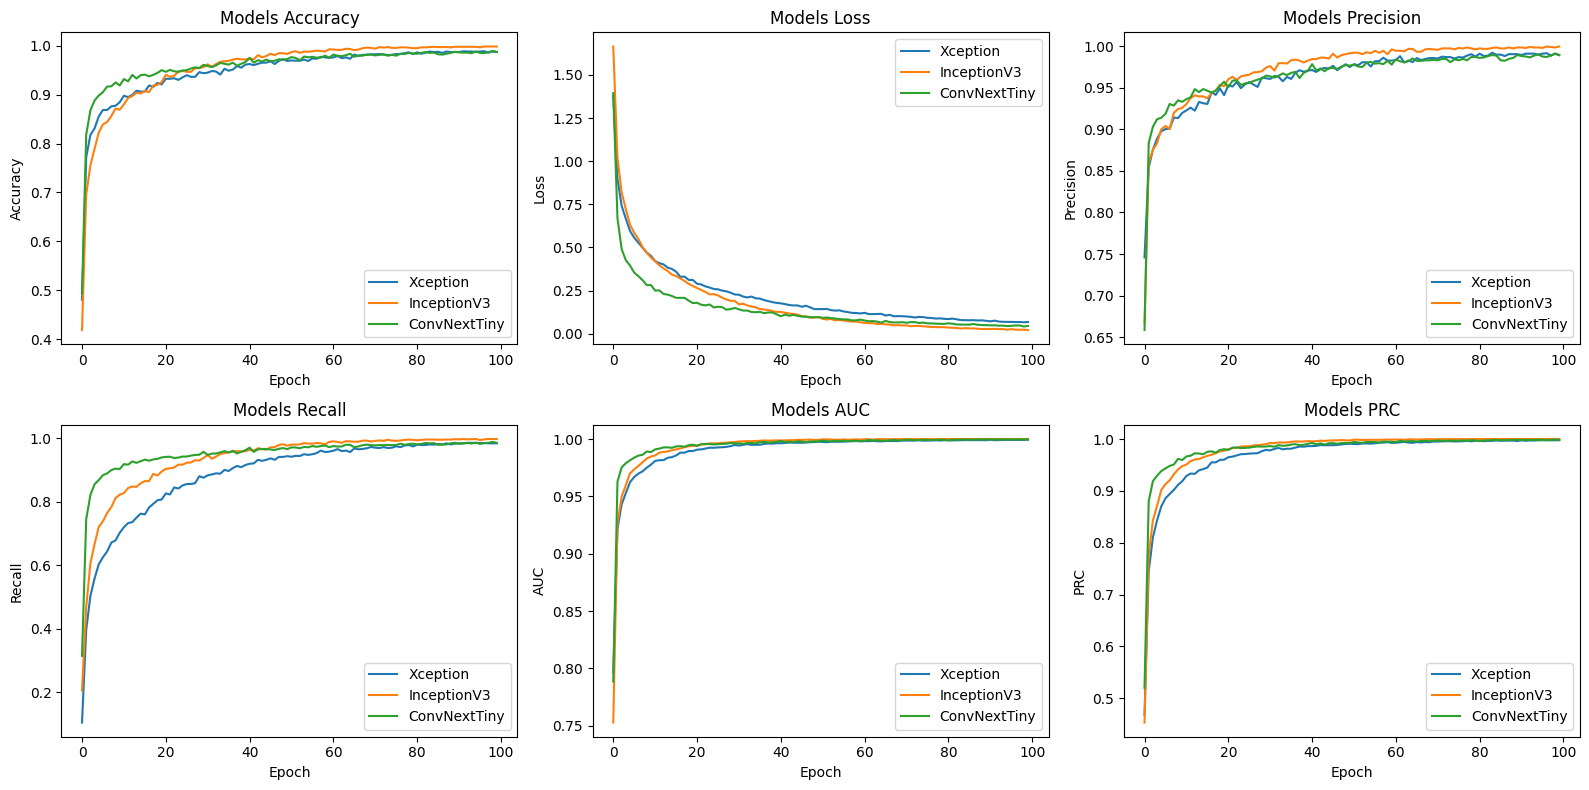

In [14]:
# Plot training history for multiple metrics
plt.figure(figsize=(16, 8))

# Plot training & validation accuracy values
plt.subplot(2, 3, 1)
plt.plot(Xcept['accuracy'],label='Xception')
plt.plot(Incv3['accuracy'],label='InceptionV3')
plt.plot(Conv['accuracy'],label='ConvNextTiny')
plt.title('Models Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training & validation loss values
plt.subplot(2, 3, 2)
plt.plot(Xcept['loss'],label='Xception')
plt.plot(Incv3['loss'],label='InceptionV3')
plt.plot(Conv['loss'],label='ConvNextTiny')
plt.title('Models Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Plot training & validation precision values
plt.subplot(2, 3, 3)
plt.plot(Xcept['precision'],label='Xception')
plt.plot(Incv3['precision'],label='InceptionV3')
plt.plot(Conv['precision'],label='ConvNextTiny')
plt.title('Models Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
# Plot training & validation recall values
plt.subplot(2, 3, 4)
plt.plot(Xcept['recall'],label='Xception')
plt.plot(Incv3['recall'],label='InceptionV3')
plt.plot(Conv['recall'],label='ConvNextTiny')
plt.title('Models Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
# Plot training & validation AUC values
plt.subplot(2, 3, 5)
plt.plot(Xcept['auc'],label='Xception')
plt.plot(Incv3['auc'],label='InceptionV3')
plt.plot(Conv['auc'],label='ConvNextTiny')
plt.title('Models AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
# Plot training & validation PRC values
plt.subplot(2, 3, 6)
plt.plot(Xcept['prc'],label='Xception')
plt.plot(Incv3['prc'],label='InceptionV3')
plt.plot(Conv['prc'],label='ConvNextTiny')
plt.title('Models PRC')
plt.xlabel('Epoch')
plt.ylabel('PRC')
plt.legend()
plt.tight_layout()
plt.savefig('NON_YOLO_RESULTS',dpi=300)
plt.show()